# Import libs

In [88]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Read image data

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


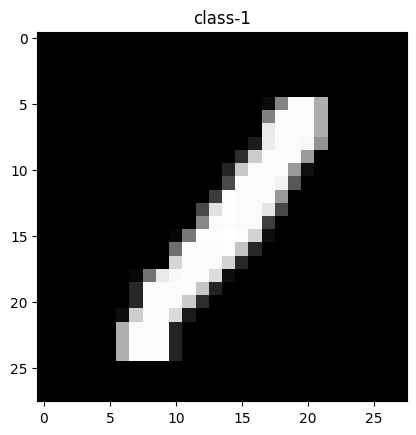

Train image 23795-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  10
  133 253 253 174   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 129
  251 251 251 173   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 233
  251 251 251 173   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  

In [9]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = '/home/biswajitrana/Documents/2nd_semester/RKMVERI_2ND/class/ML/SS_assignments_1/'# Change your data path

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
# rand_ids=12553
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



In [14]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [16]:
def find_frequency(arr):
    frequency = {}
    
    # Count frequency of each element
    for element in arr:
        if element in frequency:
            frequency[element] += 1
        else:
            frequency[element] = 1
            
    return frequency

# Example usage:
frequency = find_frequency(train_labels)
print("Element\tFrequency")
for element, freq in frequency.items():
    print(element, "\t", freq)


Element	Frequency
5 	 5421
0 	 5923
4 	 5842
1 	 6742
9 	 5949
2 	 5958
3 	 6131
6 	 5918
7 	 6265
8 	 5851


In [24]:
def split_array_by_value(array):
    split_arrays = {}
    for value in range(10):  # Values range from 0 to 9
        indices = np.where(array == value)[0]
        random_indices = np.random.choice(indices, size=600, replace=False)
        split_arrays[value] = random_indices
    return split_arrays

# Example usage:
# original_array = np.random.randint(0, 10, size=60000)  # Generating random 1D array with values from 0 to 9
split_arrays = split_array_by_value(train_labels)

# Printing the lengths of each split array
for value, indices in split_arrays.items():
    print(f"Array for value {value}: {len(indices)} elements")


Array for value 0: 600 elements
Array for value 1: 600 elements
Array for value 2: 600 elements
Array for value 3: 600 elements
Array for value 4: 600 elements
Array for value 5: 600 elements
Array for value 6: 600 elements
Array for value 7: 600 elements
Array for value 8: 600 elements
Array for value 9: 600 elements


In [30]:
# split_arrays[0]

array([42552, 28993,  4488, 53747, 54303, 42270, 41789, 42764,  5583,
       34985,  5462, 10045, 10195, 58462, 47786,  6341, 53403, 40217,
       45952, 16192, 25252, 41857,  4505, 37854,  7243,  6593, 25919,
        1000, 42783, 11742,  3610,  6421, 13528, 45383,  8935, 17606,
        1606, 12716, 58492, 30320, 49575, 24698,  1209, 46763,  3016,
       14557, 31361, 28002, 47976, 12796, 35261, 16031, 43074, 41338,
       53401, 59878, 20591,  9402, 17095, 59363, 18936, 37559, 38929,
       16217,  2435, 21614,  1605, 43169, 53575, 27170, 52305, 30119,
       37656, 32268, 36737, 40613, 20292, 34580, 32086,   326,  2899,
       58532, 53256, 59723,  1386, 53353, 19774, 11077, 19732, 41756,
       49716, 31095, 56353,  4653, 48578, 51006, 39615, 10221,  1471,
        5393, 20391, 47740, 29055, 22929, 44838,  9934,  7649, 42053,
       45833,  1837, 33983, 20388, 26645, 48263, 49208, 12504, 54089,
       39581, 15383, 35525, 29468, 41052, 31389, 42632,  7669, 46992,
       42945, 19565,

In [34]:
# train_labels[split_arrays[0]]

In [82]:
#  Create an empty array of shape (6000, 28, 28)
new_array = np.empty((6000, 28, 28))

# Verify the shape of the empty array
print("Shape of the empty array:", new_array.shape)
j=0
k=600
for i in range(0, len(split_arrays)):
    new_array[j:k,:,:] = train_images[split_arrays[i]]
    j+=600
    k+=600

Shape of the empty array: (6000, 28, 28)


In [83]:
new_array[5999,:,:]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

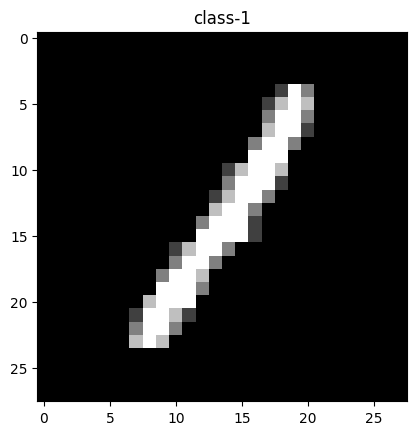

In [85]:
plt.imshow(new_array[600, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

In [87]:
new_array.shape

(6000, 28, 28)

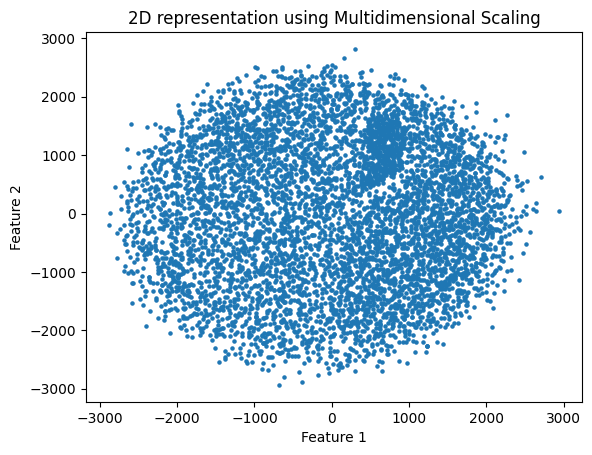

In [90]:


# Assuming you have a 6000x28x28 array named 'data'
# data = np.random.rand(6000, 28, 28)  # Example data, replace it with your actual data

# Flatten the data to be suitable for MDS
flattened_data = new_array.reshape(new_array.shape[0], -1)

# Apply Multidimensional Scaling
mds = MDS(n_components=2)
mds_result = mds.fit_transform(flattened_data)

# Plot the 2D representation
plt.scatter(mds_result[:, 0], mds_result[:, 1], s=5)
plt.title('2D representation using Multidimensional Scaling')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
